<a href="https://colab.research.google.com/github/ghulam2545/deep_learning/blob/main/main4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import all necessary python/ML libraries

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.preprocessing.image import ImageDataGenerator

print('GPU is available' if tf.config.list_physical_devices('GPU') else 'GPU is not available')

GPU is available


In [2]:
# These are the directory location for used images

train_dir = '/content/drive/MyDrive/dataset/chest_xray/train'
val_dir = '/content/drive/MyDrive/dataset/chest_xray/val'
test_dir = '/content/drive/MyDrive/dataset/chest_xray/test'

In [3]:
# some preprocessing steps

train_generator = ImageDataGenerator(
    rescale = 1. / 255,
)

In [4]:
test_generator = ImageDataGenerator(
    rescale = 1. / 255
)

In [5]:
# globally available params

img_dim = 200
batch_size = 32

In [6]:
# load training dataset into program

train_ds = train_generator.flow_from_directory(
    train_dir,
    target_size=(img_dim, img_dim),
    batch_size=batch_size,
    shuffle=True,
    class_mode='binary'
)

Found 5163 images belonging to 2 classes.


In [7]:
# load test dataset into program

test_ds = test_generator.flow_from_directory(
    test_dir,
    target_size=(img_dim, img_dim),
    batch_size=batch_size,
    shuffle=True,
    class_mode='binary'
)

Found 613 images belonging to 2 classes.


In [8]:
# structure/specification of datasets

x_train, y_train = train_ds.next()

print(x_train.shape)
print(y_train.shape)

(32, 200, 200, 3)
(32,)


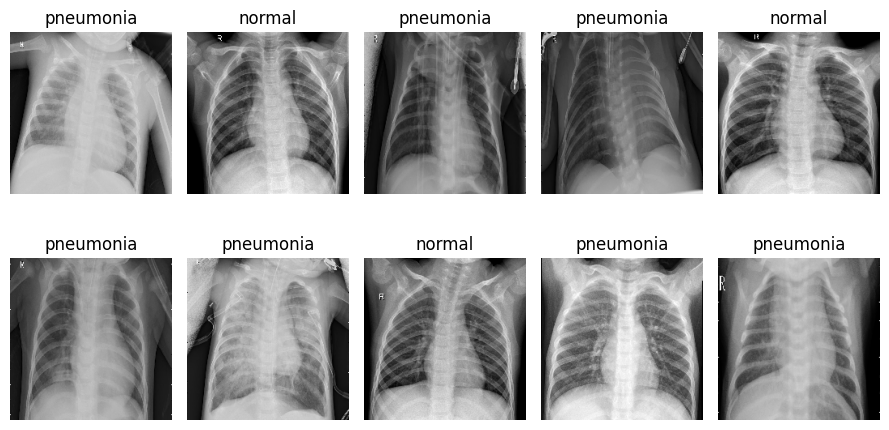

In [9]:
# lookup at some train images

plt.figure(figsize=(9, 5))
for i in range(2*5):
  plt.subplot(2, 5, i+1)
  plt.imshow(x_train[i])
  plt.title('normal' if int(y_train[i]) == 0 else 'pneumonia')
  plt.axis('off')
plt.tight_layout()
plt.show()

In [10]:
# We brought this model structure because this suitably works fine,
# our previous model goes to underfitting situation.
# probably we will make changes in future.

input = layers.Input(shape=(img_dim, img_dim, 3))

# First conv layer
x = layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same')(input)
x = layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = layers.MaxPool2D(pool_size=(2, 2))(x)

# Second conv layer
x = layers.SeparableConv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = layers.SeparableConv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPool2D(pool_size=(2, 2))(x)

# Third conv layer
x = layers.SeparableConv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = layers.SeparableConv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPool2D(pool_size=(2, 2))(x)

# Fourth conv layer
x = layers.SeparableConv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = layers.SeparableConv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPool2D(pool_size=(2, 2))(x)
x = layers.Dropout(rate=0.2)(x)

# Fully Connected layer
x = layers.Flatten()(x)
x = layers.Dense(units=128, activation='relu')(x)
x = layers.Dropout(rate=0.5)(x)
x = layers.Dense(units=64, activation='relu')(x)
x = layers.Dropout(rate=0.3)(x)

# Output layer
output = layers.Dense(units=1, activation='sigmoid')(x)

# Creating model and compiling
model = keras.Model(inputs=input, outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
# lookup at model structure

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 200, 200, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 200, 200, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 16)     0         
 )                                                               
                                                                 
 separable_conv2d (Separable  (None, 100, 100, 32)     688       
 Conv2D)                                                         
                                                                 
 separable_conv2d_1 (Separab  (None, 100, 100, 32)     1344  

In [12]:
keras.utils.plot_model(model, to_file='out.pdf', show_shapes=True)

In [13]:
# actual training for model to learn

history = model.fit(train_ds, validation_data=test_ds, batch_size=batch_size, epochs=8)

Epoch 1/8
162/162 [==============================] - 3981s 24s/step - loss: 0.2136 - accuracy: 0.9167 - val_loss: 1.1354 - val_accuracy: 0.6183
Epoch 2/8
162/162 [==============================] - 84s 518ms/step - loss: 0.1075 - accuracy: 0.9624 - val_loss: 2.0069 - val_accuracy: 0.6183
Epoch 3/8
162/162 [==============================] - 81s 500ms/step - loss: 0.0873 - accuracy: 0.9675 - val_loss: 3.5280 - val_accuracy: 0.6183
Epoch 4/8
162/162 [==============================] - 84s 518ms/step - loss: 0.0629 - accuracy: 0.9793 - val_loss: 2.9942 - val_accuracy: 0.6199
Epoch 5/8
162/162 [==============================] - 80s 493ms/step - loss: 0.0608 - accuracy: 0.9787 - val_loss: 2.2922 - val_accuracy: 0.6378
Epoch 6/8
162/162 [==============================] - 79s 488ms/step - loss: 0.0511 - accuracy: 0.9822 - val_loss: 0.4840 - val_accuracy: 0.8418
Epoch 7/8
162/162 [==============================] - 80s 497ms/step - loss: 0.0383 - accuracy: 0.9866 - val_loss: 2.0493 - val_accuracy:

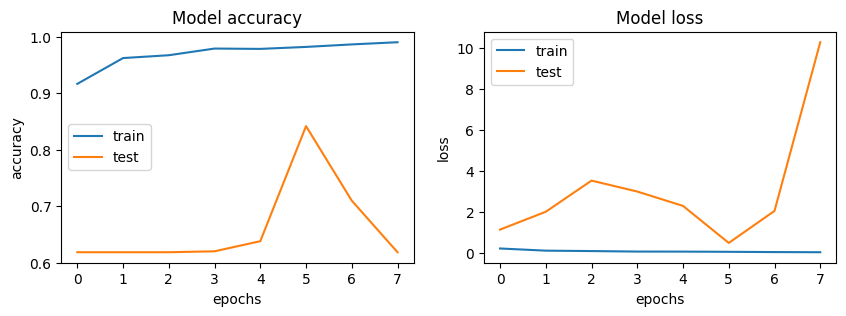

In [14]:
# diagrams

fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax = ax.ravel()

for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'test'])

In [15]:
# check models performance for test dataset

model.evaluate(test_ds, batch_size=batch_size)

20/20 [==============================] - 7s 354ms/step - loss: 10.2853 - accuracy: 0.6183


[10.285260200500488, 0.6182708144187927]

In [16]:
# picking up some sample images for prediction

sample = test_ds.next()

x_test, y_test = sample

print(x_test.shape)
print(y_test.shape)

(32, 200, 200, 3)
(32,)


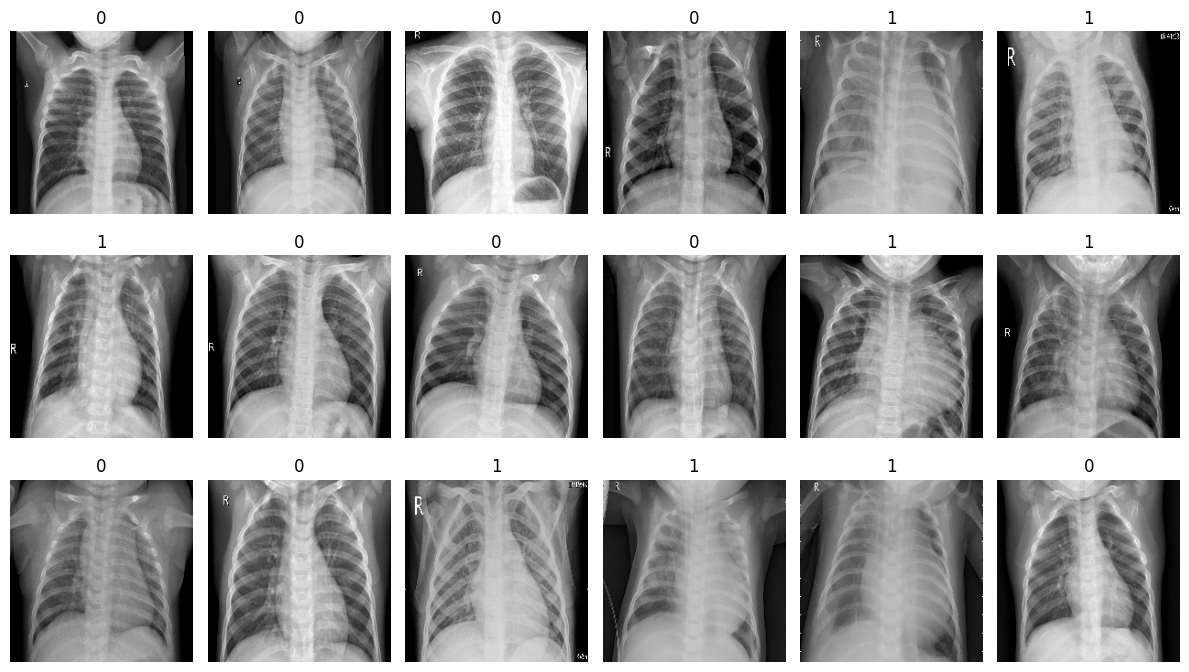

In [17]:
# lookup at 18 sample images

plt.figure(figsize=(12, 7))
for i in range(3*6):
  plt.subplot(3, 6, i+1)
  plt.imshow(x_test[i])
  plt.title(int(y_test[i]))
  plt.axis('off')
plt.tight_layout()
plt.show()

In [18]:
# make predictions

pred = model.predict(x_test)

for i in pred[:18]:
  print(0 if i < 0.5 else 1, end=', ')

1/1 [==============================] - 0s 242ms/step
1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [19]:
# 0 - normal
# 1 - pneumonia

In [20]:
# TODOS:

# try to improve accuracy
#   1. change model's structure (layers)
#   2. go for large image dataset
#   3. image augumentation can also help

# UI (must)

In [ ]:
# underfitting / overfitting ???????????????